# Data Summary and Visualizations

In [67]:
library(tidyverse)
url <- "https://raw.githubusercontent.com/Xela-debug/datasets/main/Housing.csv"
housing_df <- read_csv(url)

Rows: 545 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): mainroad, guestroom, basement, hotwaterheating, airconditioning, pr...
dbl (6): price, area, bedrooms, bathrooms, stories, parking

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Viewing the Mean Price Depending on the Number of Bedrooms

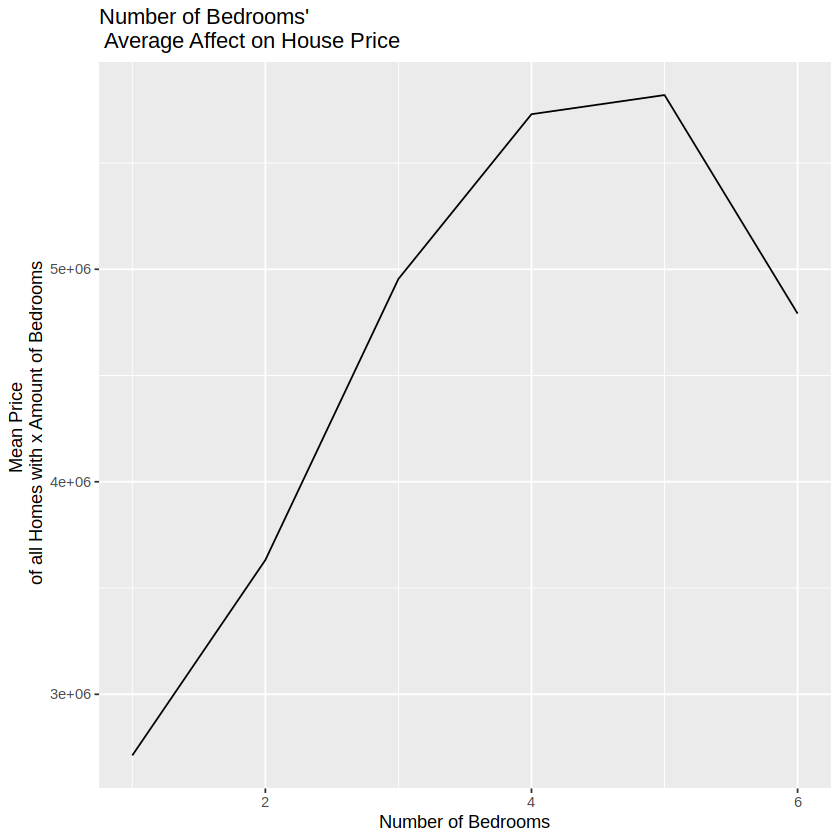

In [5]:
mean_housing_df <- housing_df |>
    group_by(bedrooms) |>
    mutate(mean_price_per_bedroom = mean(price))

housing_plot <- mean_housing_df |>
    ggplot(aes(x = bedrooms, y = mean_price_per_bedroom)) +
        geom_line() +
        labs(title = "Number of Bedrooms'\n Average Affect on House Price", x = "Number of Bedrooms", y = "Mean Price \n of all Homes with x Amount of Bedrooms")
housing_plot

In general, it seems that the number of bedrooms generally correlates with a higher priced home. So there is a strong relationship.  However, oddly enough it drops off after 5 bedrooms for an unknown reason.  This may be something we need to look into within our analysis

## Figuring out What Plays a Big Role in the Price other than Area

In [112]:
values <- c("yes", "no")
combinations <- expand.grid(
    Var1 = values,
    Var2 = values,
    Var3 = values,
    Var4 = values,
    Var4 = values,
    Var4 = values
)

for (i in seq_along(housing_df)) {
    combination_price <- housing_df |>
        filter(mainroad == combinations[i, 1] & guestroom == combinations[i, 2] & basement == combinations[i, 3] & hotwaterheating == combinations[i, 4]) |>
        summarize(amount = mean(price, na.rm = TRUE))
    
    var_name <- paste("row", i, sep = "_")
    
    i = combination_price[1, 1]
    assign(var_name, i)
#    avg_price_amenities <- avg_price_amenities |> 
#        add_column(i = i)
}

rows <- c(row_1, row_2, row_3, row_4, row_5, row_6, row_7, row_8, row_9, row_10, row_11, row_12, row_13)
avg_price_amenities <- data.frame(price = rows)
new_column_names <- c(1:13)
colnames(avg_price_amenities) <- new_column_names
avg_price_amenities |>
    pivot_longer(cols = 1:13,
          names_to = "order",
          values_to = "price")

order,price
<chr>,<dbl>
1,6678000
2,NaN
3,7682500
4,4651500
5,6090000
6,NaN
7,5212846
8,2537500
9,5766056
